# **ETL**

### Import Libraries

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from keras.layers import  Activation, Dropout, Flatten, Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

### Import data

In [ ]:
data = pd.read_csv("/content/HR-Employee-Attrition.csv")

### Exploring The Dataset

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
shape = data.shape
num_rows, num_columns = shape
size = data.size

print("Shape (rows, columns):", shape)
print("Number of columns:", num_columns)
print("Size of the dataset:", size)

Shape (rows, columns): (1470, 35)
Number of columns: 35
Size of the dataset: 51450


In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking whether columns contain unexpected values

In [ ]:
def set_membership(expected_values=[], column_name=''):
  # set - unique
  unexpected_values = set(data[column_name].unique()) - set(expected_values)

  if unexpected_values:
      print(f"Mistake! Unexpected values: {unexpected_values}")
  else:
      print("Values in categorical columns are appropriate.")

In [ ]:
set_membership(['Male', 'Female'], 'Gender')

Values in categorical columns are appropriate.


In [ ]:
set_membership(['Divorced', 'Single', 'Married'], 'MaritalStatus')

Values in categorical columns are appropriate.


In [ ]:
set_membership(['Yes', 'No'], 'Attrition')

Values in categorical columns are appropriate.


In [ ]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

Check for repetitive data in columns

In [ ]:
data.duplicated().any()

False

Check for missing data in columns

In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

unique values in columns

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

for x in categorical_columns:
  print(f"column: {x} --> {data[x].unique()}")

column: Attrition --> ['Yes' 'No']
column: BusinessTravel --> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
column: Department --> ['Sales' 'Research & Development' 'Human Resources']
column: EducationField --> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
column: Gender --> ['Female' 'Male']
column: JobRole --> ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
column: MaritalStatus --> ['Single' 'Married' 'Divorced']
column: Over18 --> ['Y']
column: OverTime --> ['Yes' 'No']


In [ ]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()} \n")

Age: Number of unique values 43 

Attrition: Number of unique values 2 

BusinessTravel: Number of unique values 3 

DailyRate: Number of unique values 886 

Department: Number of unique values 3 

DistanceFromHome: Number of unique values 29 

Education: Number of unique values 5 

EducationField: Number of unique values 6 

EmployeeCount: Number of unique values 1 

EmployeeNumber: Number of unique values 1470 

EnvironmentSatisfaction: Number of unique values 4 

Gender: Number of unique values 2 

HourlyRate: Number of unique values 71 

JobInvolvement: Number of unique values 4 

JobLevel: Number of unique values 5 

JobRole: Number of unique values 9 

JobSatisfaction: Number of unique values 4 

MaritalStatus: Number of unique values 3 

MonthlyIncome: Number of unique values 1349 

MonthlyRate: Number of unique values 1427 

NumCompaniesWorked: Number of unique values 10 

Over18: Number of unique values 1 

OverTime: Number of unique values 2 

PercentSalaryHike: Number of uni

#  **Feature Engineering**

In [ ]:
df = pd.DataFrame(data)

Does not have missing or duplicate values in the data set

We discard entries with a low count of unique values as they are not useful for our analysis. Of course, excluding data like gender or department


In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Detecting outliers and using IQR to deal with outliers

At this stage, we detect outliers and fill them with the median value.

In [ ]:
numerical_columns = df.select_dtypes(include=['int64']).columns
print(numerical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
numerical_data = df[numerical_columns]

In [ ]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EnvironmentSatisfaction   1470 non-null   int64
 5   HourlyRate                1470 non-null   int64
 6   JobInvolvement            1470 non-null   int64
 7   JobLevel                  1470 non-null   int64
 8   JobSatisfaction           1470 non-null   int64
 9   MonthlyIncome             1470 non-null   int64
 10  MonthlyRate               1470 non-null   int64
 11  NumCompaniesWorked        1470 non-null   int64
 12  PercentSalaryHike         1470 non-null   int64
 13  PerformanceRating         1470 non-null   int64
 14  RelationshipSatisfaction  1470 non-null 

In [ ]:
total_outliers = 0

def fill_outliers_with_median(numerical_data):
    global total_outliers

    for column in numerical_data.columns:

        Q1 = numerical_data[column].quantile(0.25)
        Q3 = numerical_data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers value
        outliers = (numerical_data[column] < lower_bound) | (numerical_data[column] > upper_bound)
        total_outliers += outliers.sum()

        print(f"\n *** {column} ***")
        print("IQR: ", IQR)
        print("Upper bound: ", upper_bound)
        print("Lower bound: ", lower_bound)
        print("Total Outliers: ", total_outliers)

        indexes = []
        for i in outliers:
          indexes.append(i)


        median_value = numerical_data[column].median()
        numerical_data.loc[indexes, column] = median_value
        print(f"median:  {median_value}, değişti: {numerical_data[column][indexes]} ")

    return numerical_data

In [ ]:
df_iqr = fill_outliers_with_median(numerical_data)


 *** Age ***
IQR:  13.0
Upper bound:  62.5
Lower bound:  10.5
Total Outliers:  0
median:  36.0, değişti: Series([], Name: Age, dtype: int64) 

 *** DailyRate ***
IQR:  692.0
Upper bound:  2195.0
Lower bound:  -573.0
Total Outliers:  0
median:  802.0, değişti: Series([], Name: DailyRate, dtype: int64) 

 *** DistanceFromHome ***
IQR:  12.0
Upper bound:  32.0
Lower bound:  -16.0
Total Outliers:  0
median:  7.0, değişti: Series([], Name: DistanceFromHome, dtype: int64) 

 *** Education ***
IQR:  2.0
Upper bound:  7.0
Lower bound:  -1.0
Total Outliers:  0
median:  3.0, değişti: Series([], Name: Education, dtype: int64) 

 *** EnvironmentSatisfaction ***
IQR:  2.0
Upper bound:  7.0
Lower bound:  -1.0
Total Outliers:  0
median:  3.0, değişti: Series([], Name: EnvironmentSatisfaction, dtype: int64) 

 *** HourlyRate ***
IQR:  35.75
Upper bound:  137.375
Lower bound:  -5.625
Total Outliers:  0
median:  66.0, değişti: Series([], Name: HourlyRate, dtype: int64) 

 *** JobInvolvement ***
IQR:  1

<ipython-input-25-85bdc3992a8e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.loc[indexes, column] = median_value
<ipython-input-25-85bdc3992a8e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.loc[indexes, column] = median_value
<ipython-input-25-85bdc3992a8e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.loc[indexes, column] = median_value
<ipython-input-25-85bdc3992a8e>:31: Sett

In [ ]:
df_iqr.isna().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
df_iqr.shape

(1470, 23)

Let's visualize and compare the 'df' dataset with outlier values and the 'df_iqr' dataset with outliers removed.
<br>
df data

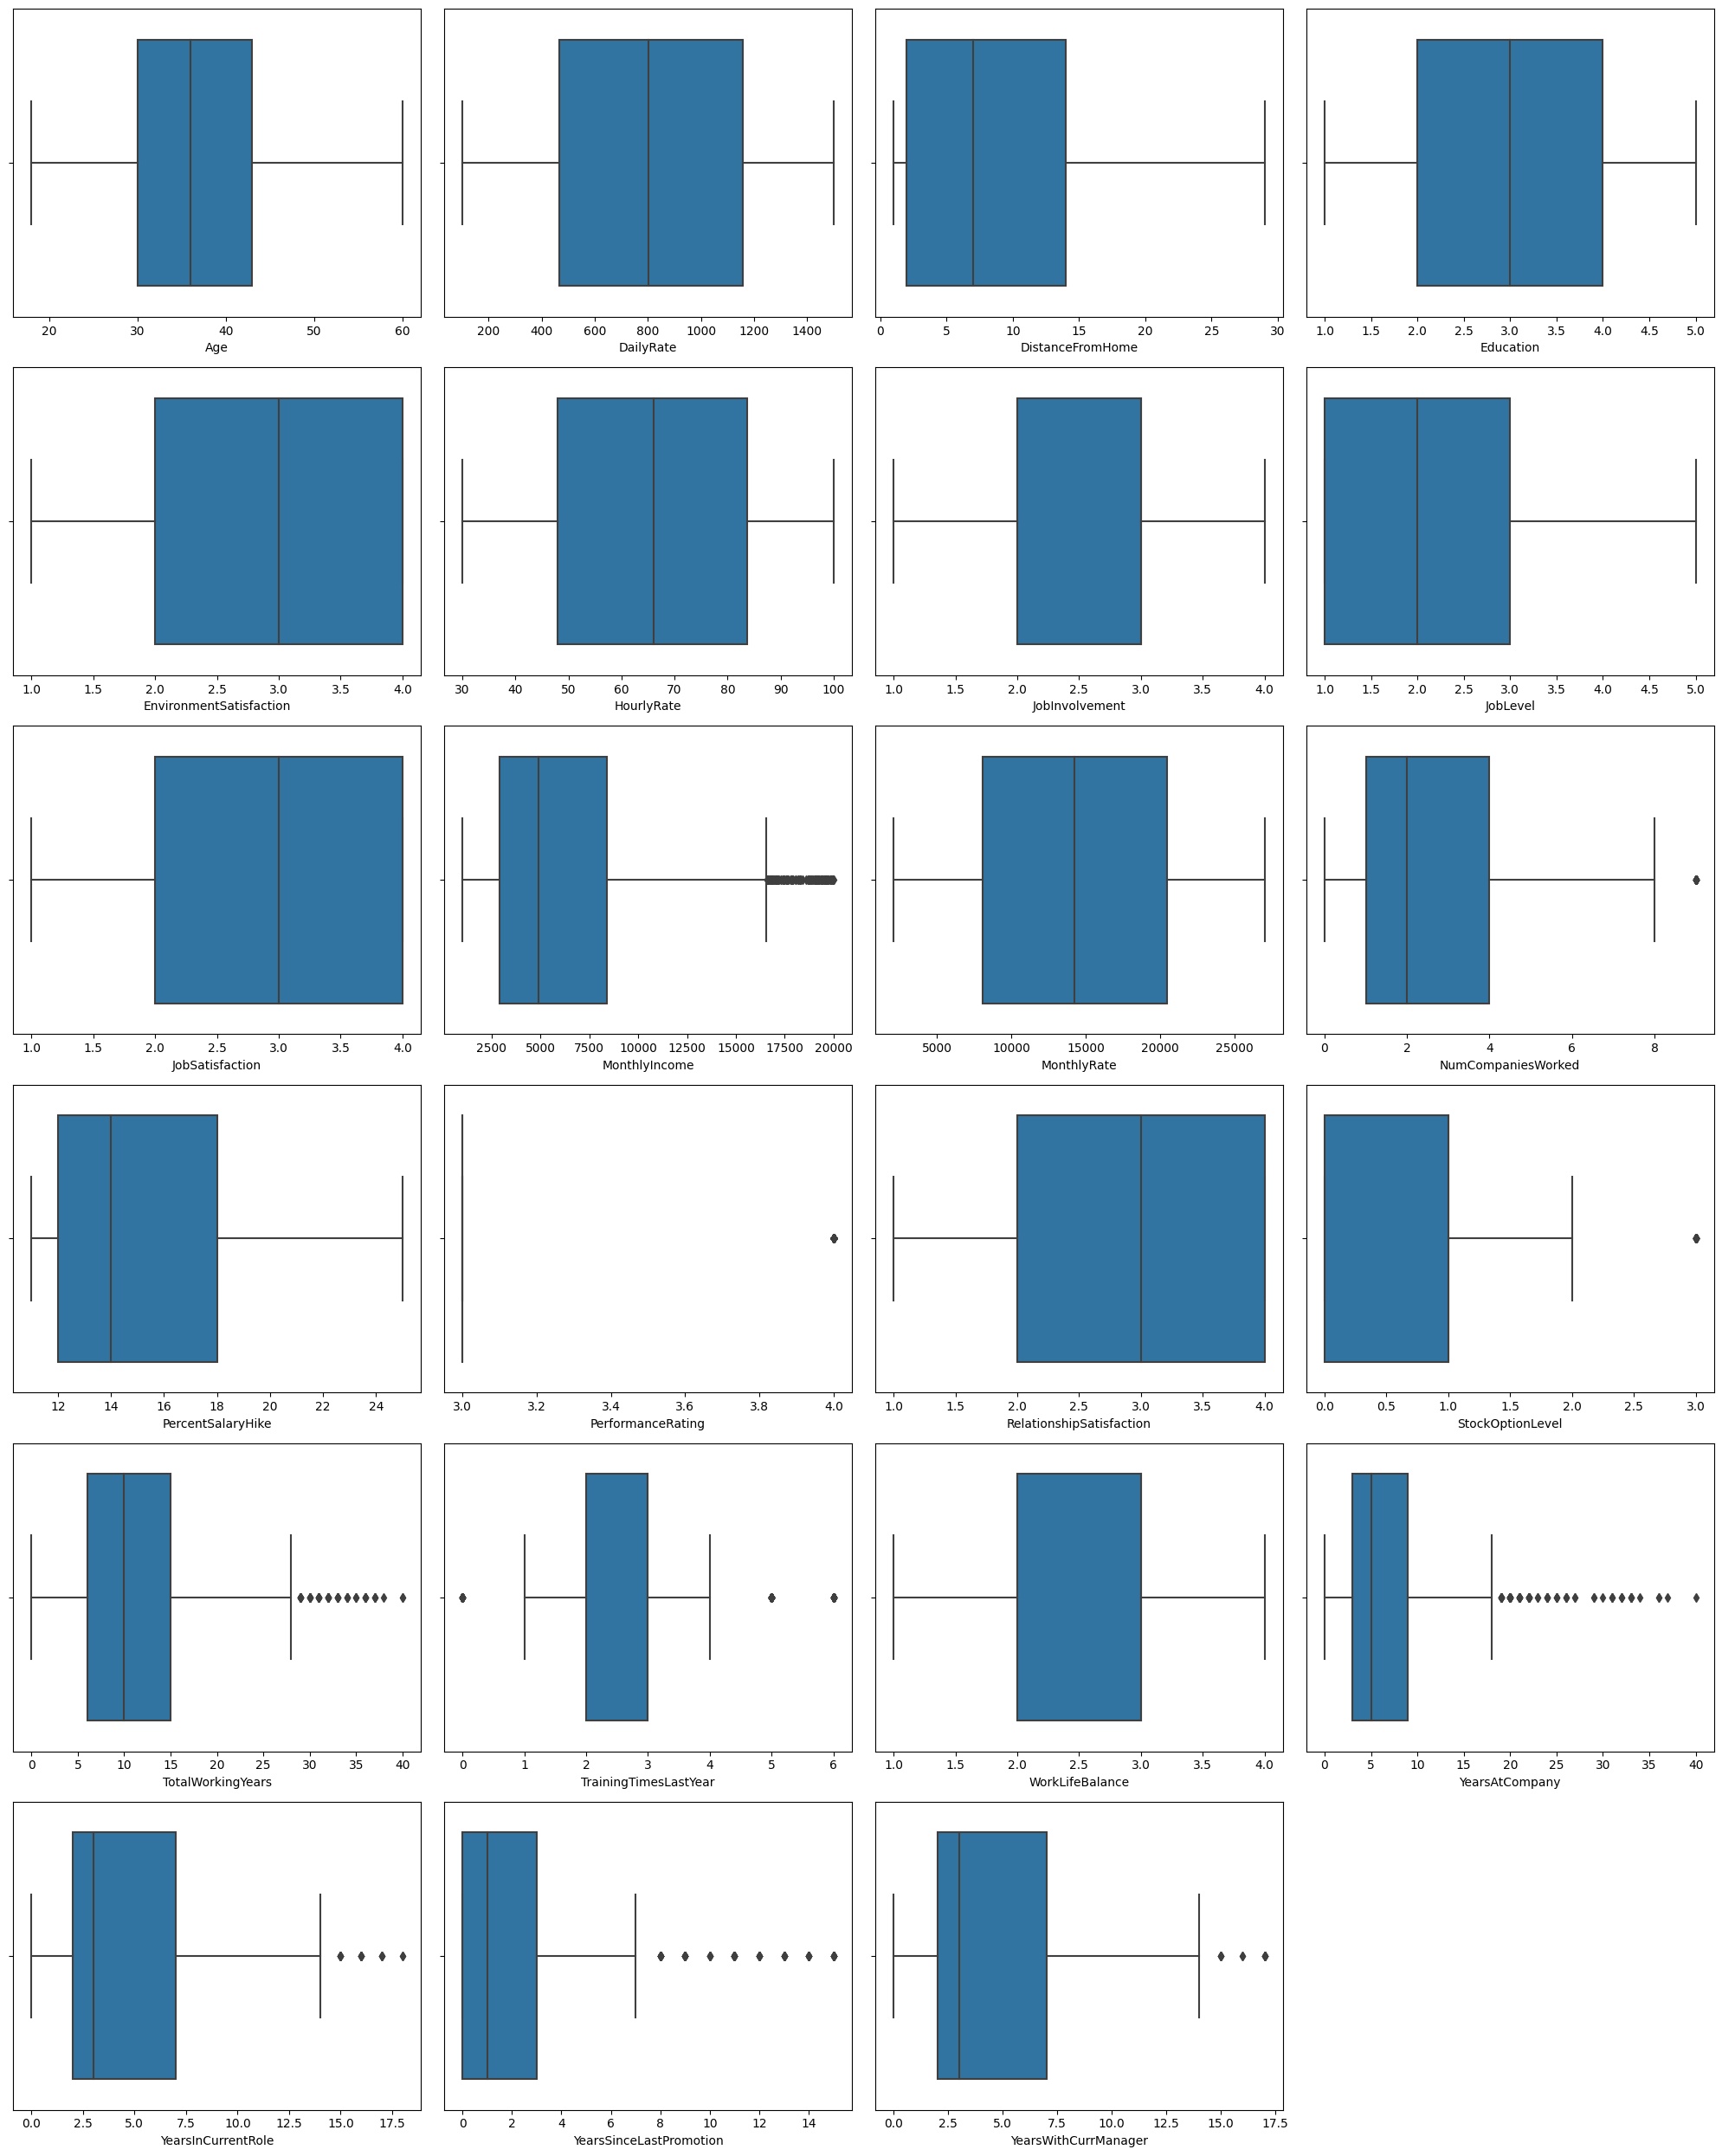

In [ ]:
num_plots = len(numerical_columns)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))


axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

df_iqr

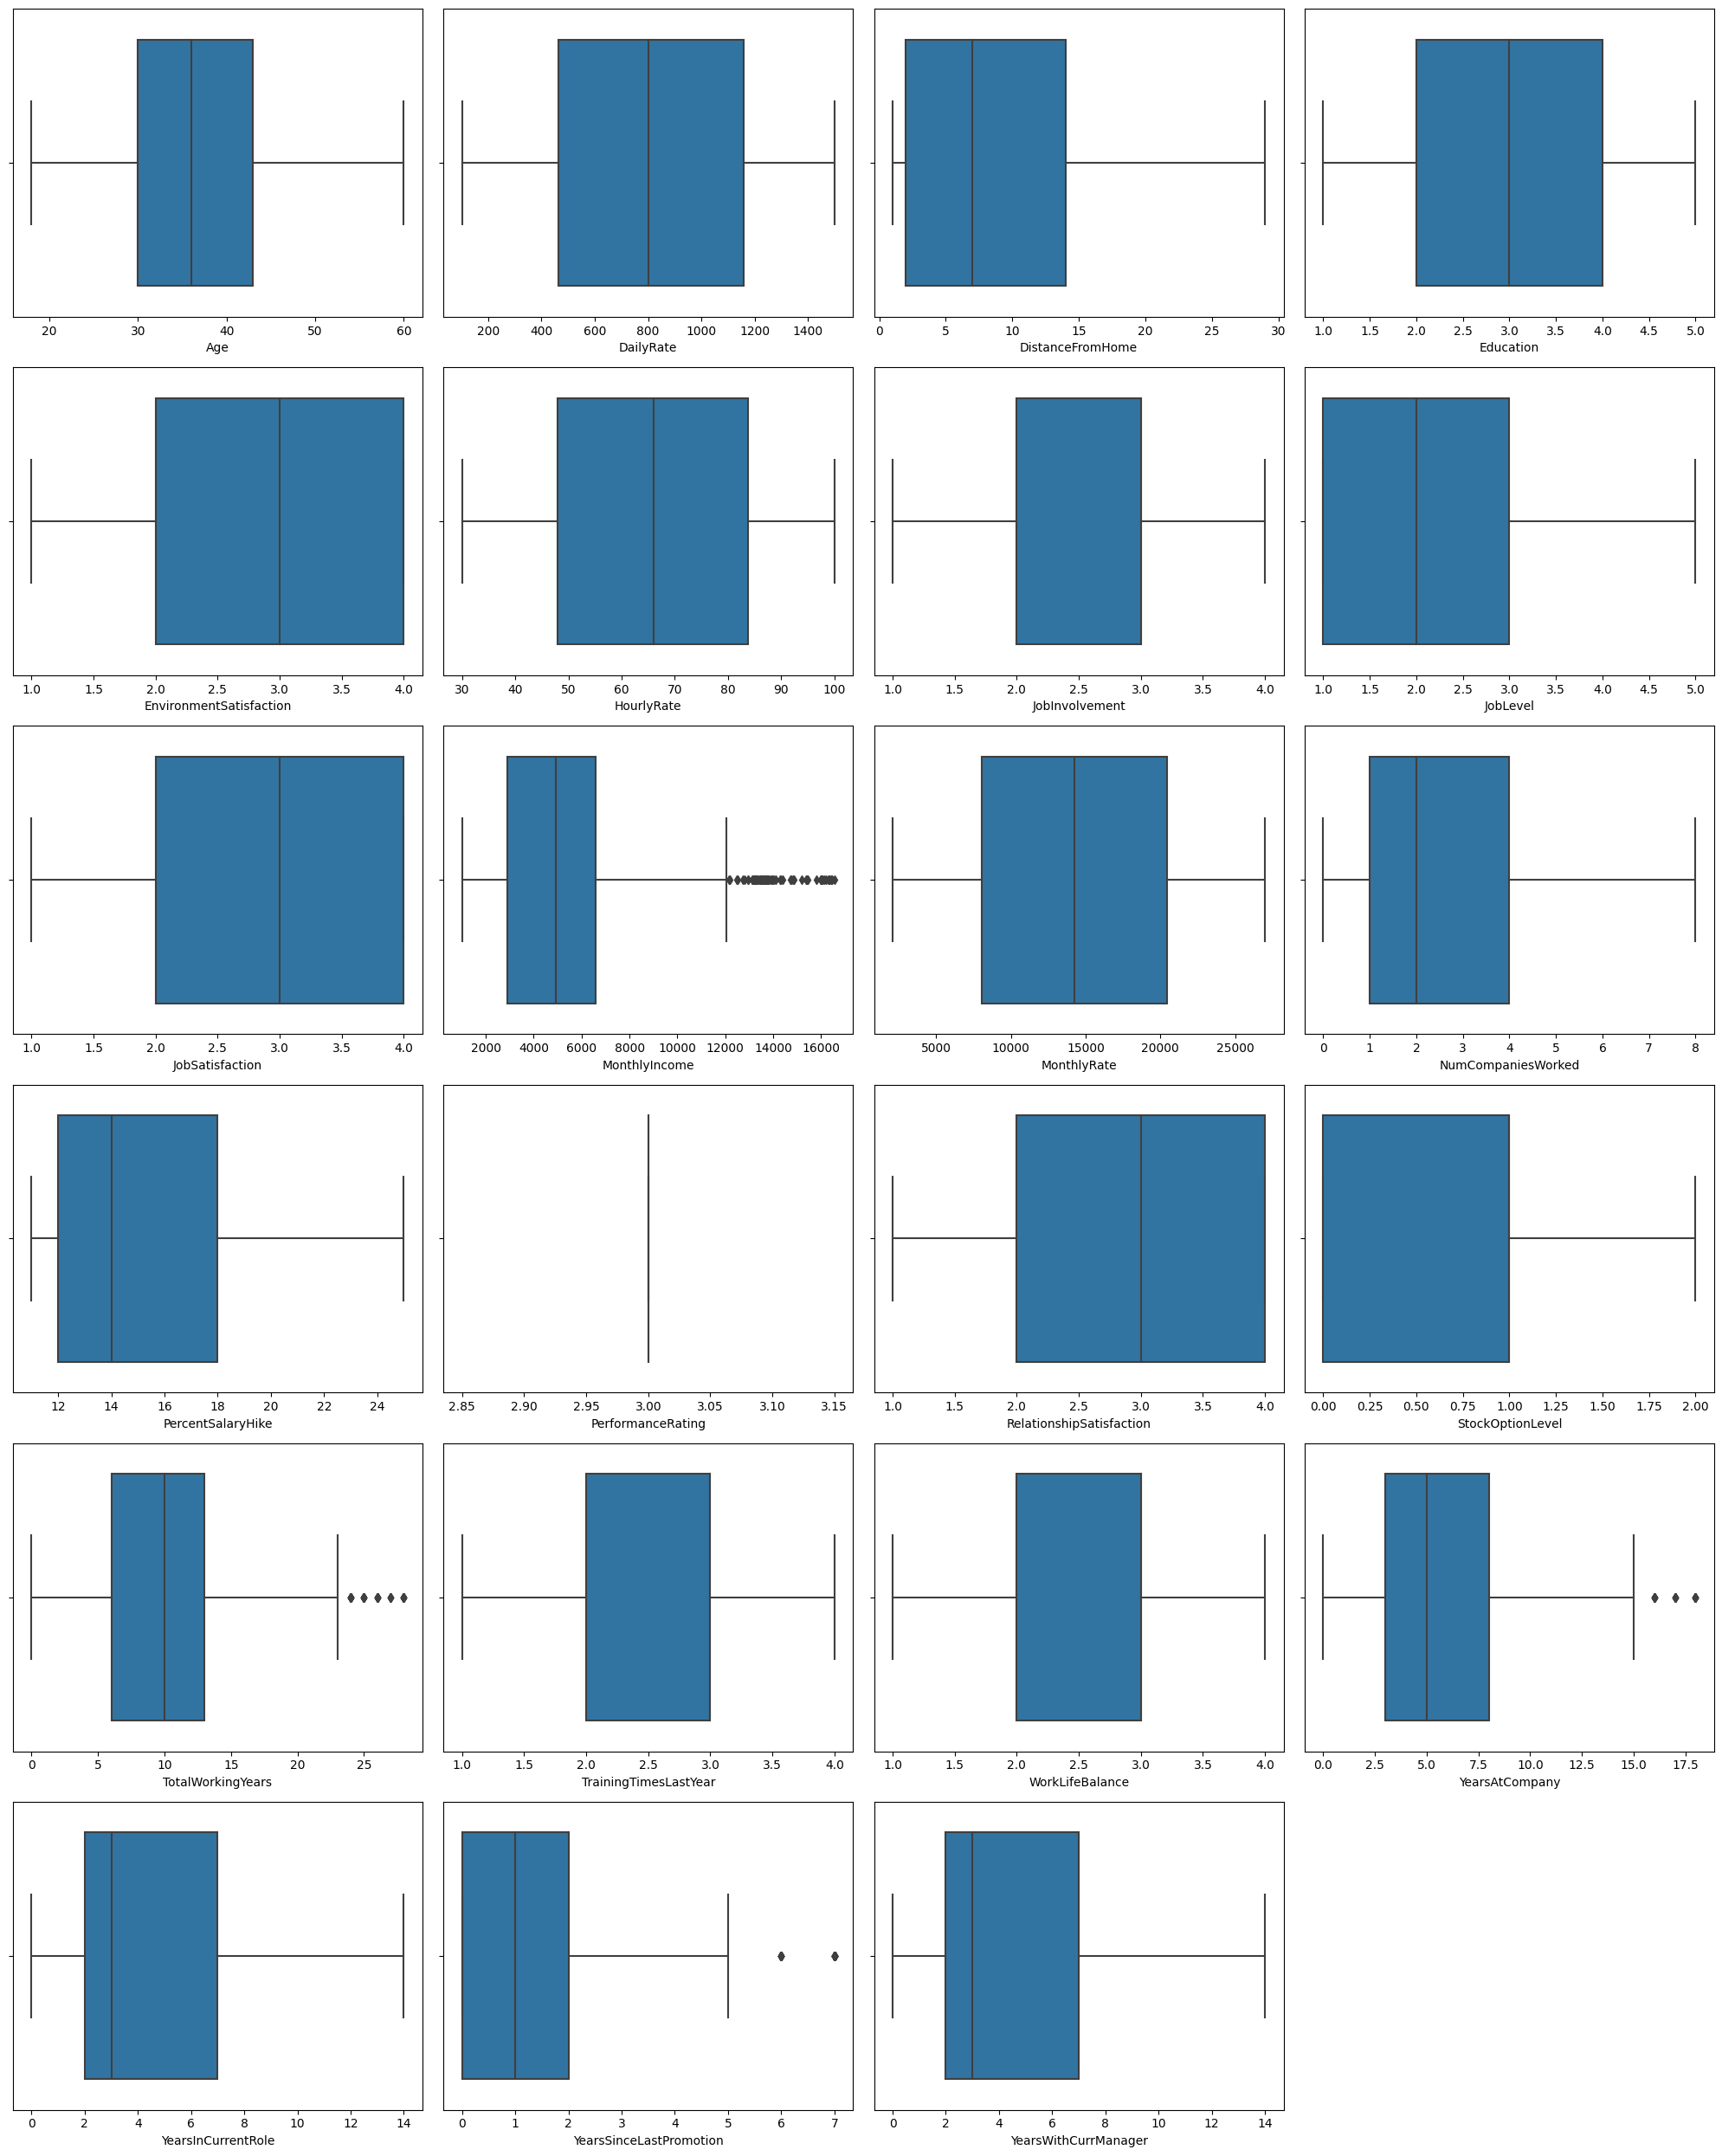

In [ ]:
num_plots = len(numerical_columns)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))


axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_iqr[column], ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### One-Hot encoding for categorical columns

In [ ]:
df["Attrition"]

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Attrition'])
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [ ]:
df["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
categorical_data = df[categorical_columns]

In [ ]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  1470 non-null   object
 1   Department      1470 non-null   object
 2   EducationField  1470 non-null   object
 3   Gender          1470 non-null   object
 4   JobRole         1470 non-null   object
 5   MaritalStatus   1470 non-null   object
 6   OverTime        1470 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


In [ ]:
categorical_data.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [ ]:
df_encoded = pd.get_dummies(categorical_data[categorical_columns], columns=categorical_columns, drop_first=True)

In [ ]:
df_encoded.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_encoded['Attrition'] = df['Attrition']

In [ ]:
df_encoded.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_clean = pd.concat([df_iqr, df_encoded], axis=1)

In [ ]:
df_clean.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scienti

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EnvironmentSatisfaction            1470 non-null   int64  
 5   HourlyRate                         1470 non-null   int64  
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1470 non-null   int64  
 10  MonthlyRate                        1470 non-null   float64
 11  NumCompaniesWorked                 1470 non-null   int64

# **Data Visulation**

In this section, we are using the 'df' dataset because the features have been processed and placed into a separate data frame.

Let's examine the distribution of the features in the data set and their relationship with the 'Attrition' column

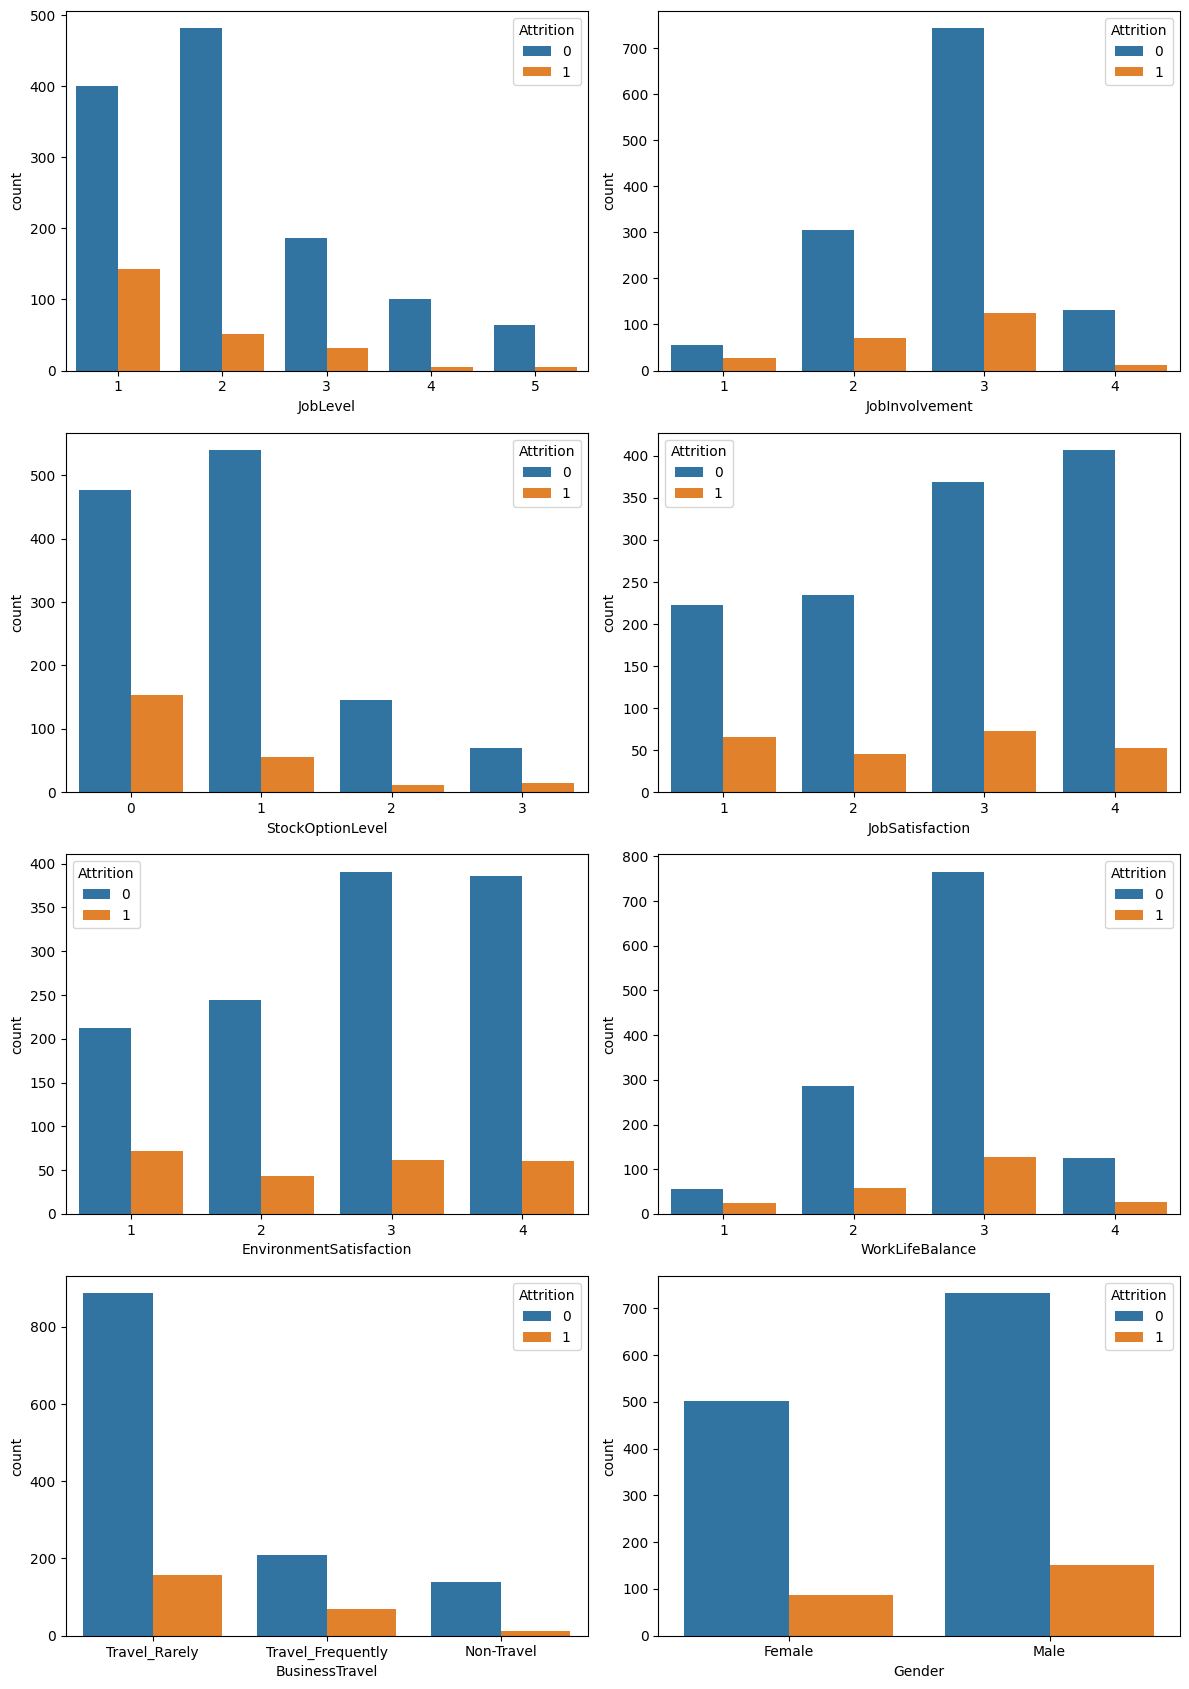

In [ ]:
visulation_columns = ['JobLevel', 'JobInvolvement', 'StockOptionLevel', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Gender']

fig, axes = plt.subplots(4, 2, figsize=(12, 17))
axes = axes.flatten()

for ax, column in zip(axes, visulation_columns):
    sns.countplot(data=df, x=column, hue="Attrition", ax=ax)

    for p in ax.patches:
        height = p.get_height()


plt.tight_layout()
plt.show()

<Axes: xlabel='Attrition', ylabel='count'>

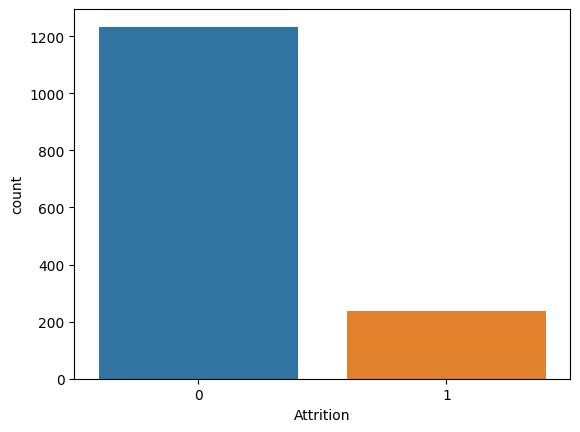

In [ ]:
sns.countplot(x='Attrition', data=df)

We have an imbalanced dataset, so we will apply SMOTE later.

### Correlation between features

we will use df_clean because corr.matrix need the numerical data

In [ ]:
correlation_matrix = df_clean.corr()

In [ ]:
df_clean.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scienti

To better understand the correlation between our target column 'Attrition' and other data, data whose correlation with 'Attrition' is above the threshold value are included in the visualization.

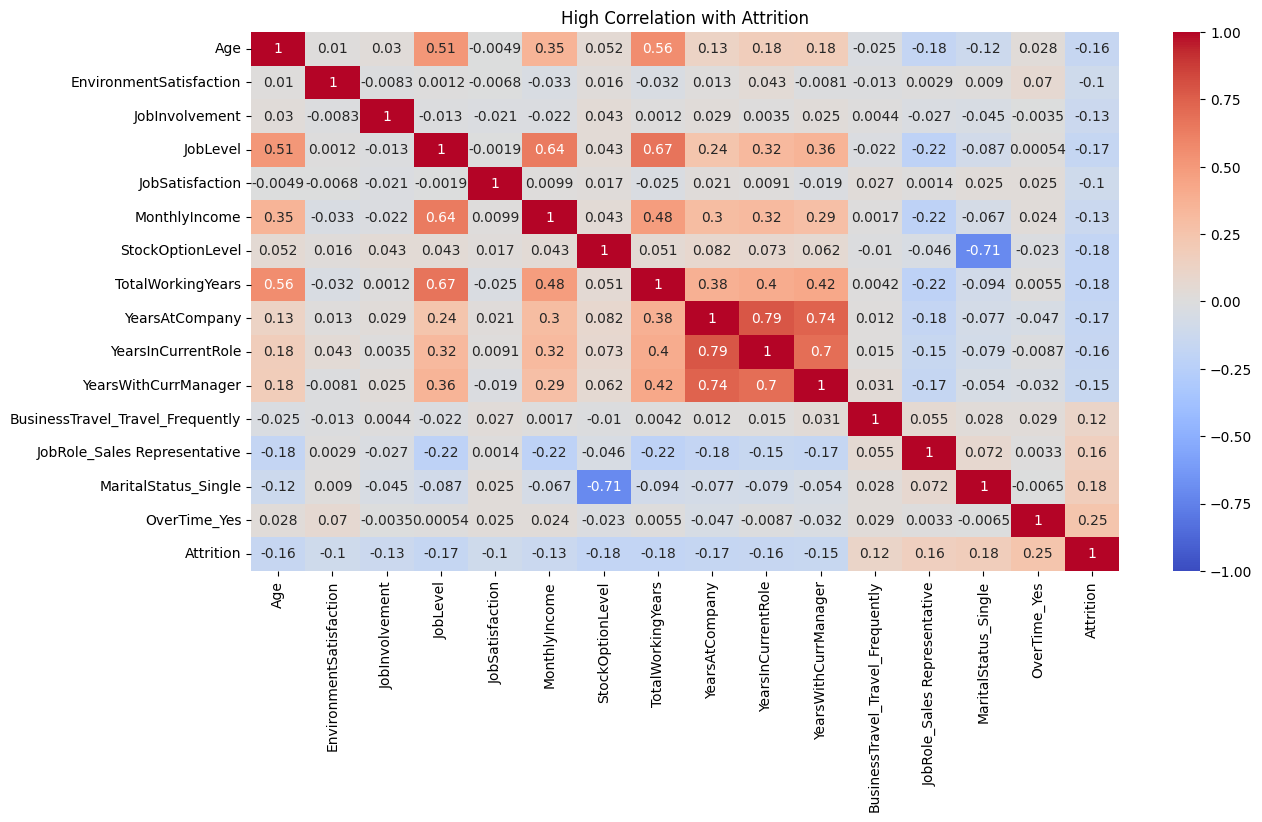

In [ ]:
selected_columns = correlation_matrix[abs(correlation_matrix['Attrition']) >= 0.1].index.tolist()

plt.figure(figsize=(14, 7))
sns.heatmap(df_clean[selected_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('High Correlation with Attrition')
plt.show()

Correlation visualization of all features with 'Attrition'

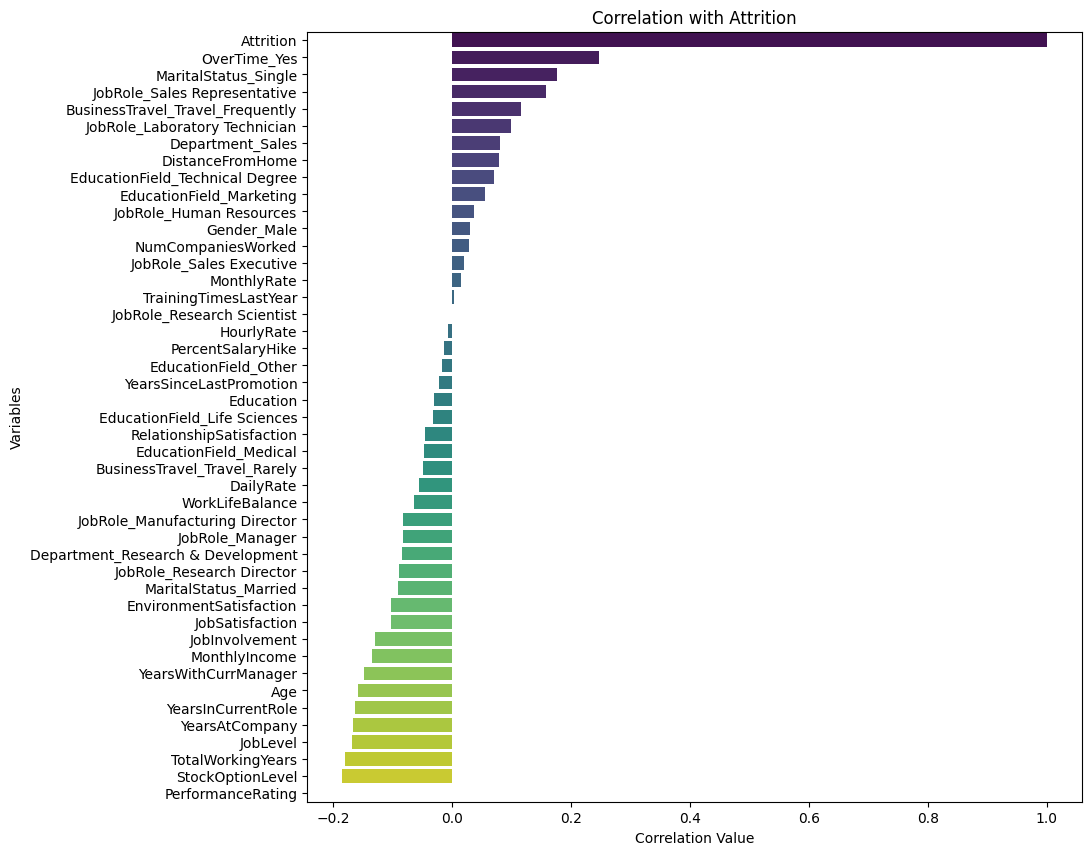

In [ ]:
attrition_correlation = correlation_matrix['Attrition']

correlation_df = pd.DataFrame({'Variable': attrition_correlation.index, 'Correlation': attrition_correlation.values})

correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Correlation', y='Variable', data=correlation_df, palette='viridis')

plt.title('Correlation with Attrition')
plt.xlabel('Correlation Value')
plt.ylabel('Variables')
plt.show()


# **Model Training / Evaluation / Selection**

Train test split

In [ ]:
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Synthetic data generation using SMOTE to deal with imbalanced data <br>
In order for the model's prediction values to be more realistic, the SMOTE process is applied only to the training data. Therefore, synthetic data generation was done at this stage.

In [ ]:
# Values before using SMOTE
Counter(y_train)

Counter({0: 978, 1: 198})

In [ ]:
# We apply it only to the training set.
smote = SMOTE(random_state=42, sampling_strategy = 0.5)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Values after using SMOTE
Counter(y_train)

Counter({0: 978, 1: 489})

Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
df_clean.shape

(1470, 45)

PCA

The increase in the number of features due to the application of One-Hot encoding to categorical variables in the dataset led to unsuccessful predictions by the models. Two methods were tried for feature reduction:

1.  Features with low correlation with the target variable were removed (*threshold value = 0.1*).

2. Feature reduction was achieved by applying PCA to the independent variables.

The best model predictions occurred when PCA was used among these two methods. So I continue using PCA.


Let's visualize the feature-explained variance values to decide on the '*n_components*' parameter in PCA.

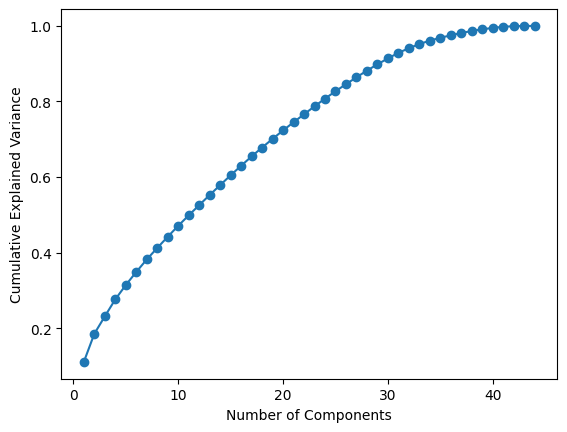

In [ ]:
pca = PCA()
pca.fit(X_train)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Machine Learning Models


I have written the 'train_and_evaluate_model()' function to easily train models and examine accuracy metrics.

In [ ]:
def train_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test, cv=10, metrics=None):

    if metrics is None:
        metrics = ['accuracy', 'precision', 'recall', 'f1']

    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results = {
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'cv_scores': cv_scores
    }

    return results


I have written a function that visualizes the Confusion Matrix, ROC Curve, and Precision-Recall values to better evaluate the prediction performance of the model.

In [ ]:
def model_evaluation_plotter(model_name, model, X_test, y_test, figsize=(20, 5)):
    if model_name is None:
      model_name = 'model'

    y_scores = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=figsize)

    # Confusion Matrix
    plt.subplot(1, 3, 1)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=sns.cubehelix_palette(as_cmap=True))
    plt.ylabel('Actual', fontsize=13)
    plt.xlabel('Prediction', fontsize=13)
    plt.title(f"{model_name} Confusion Matrix")

    # ROC curve
    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc='lower right')

    # Precision - Recall
    plt.subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"{model_name} Precision-Recall Curve: AP={0:0.2f}".format(average_precision))

    plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss="log", penalty="l2", max_iter=5, verbose=0)
train_and_evaluate_model('SGD Classifier', SGDC, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

{'model': 'SGD Classifier',
 'accuracy': 0.7244897959183674,
 'precision': 0.26136363636363635,
 'recall': 0.5897435897435898,
 'f1': 0.3622047244094488,
 'cv_scores': array([0.73469388, 0.7414966 , 0.75510204, 0.72789116, 0.78911565,
        0.80952381, 0.8707483 , 0.71232877, 0.80136986, 0.87671233])}

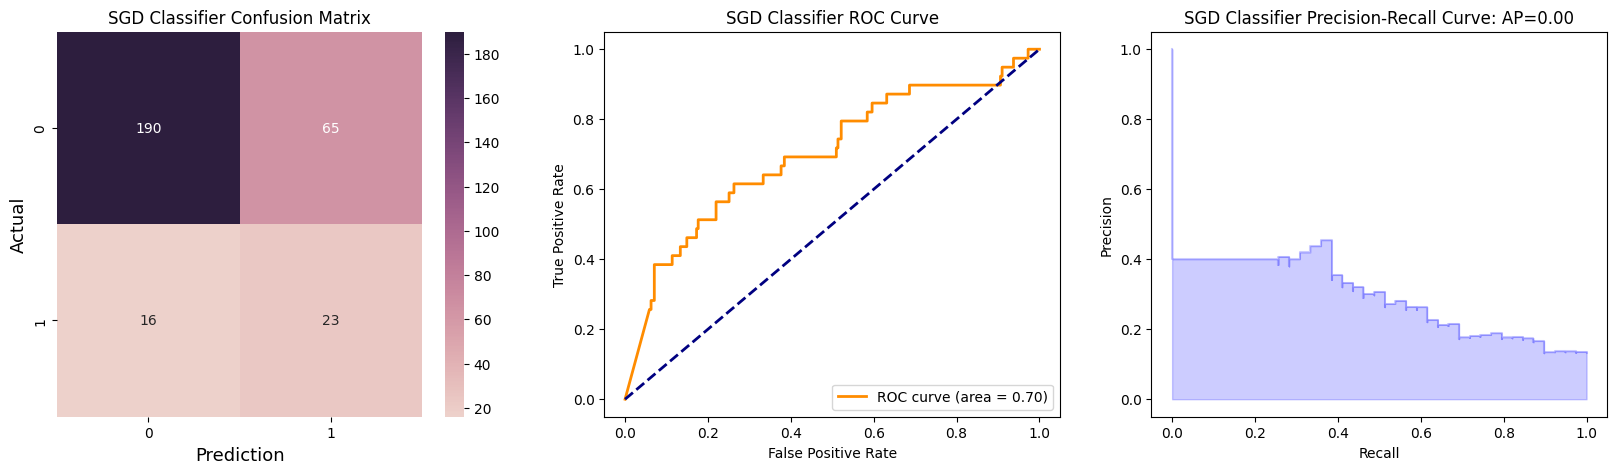

In [ ]:
model_evaluation_plotter('SGD Classifier', SGDC, X_test, y_test)

In [ ]:
rf = RandomForestClassifier(class_weight = 'balanced')
rf_result = train_and_evaluate_model('Random Forest', rf, X_train, X_test, y_train, y_test)

{'model': 'Random Forest',
 'accuracy': 0.8809523809523809,
 'precision': 0.625,
 'recall': 0.2564102564102564,
 'f1': 0.3636363636363636,
 'cv_scores': array([0.66666667, 0.72108844, 0.70748299, 0.70748299, 0.93877551,
        0.97278912, 0.96598639, 0.9109589 , 0.97260274, 0.95890411])}

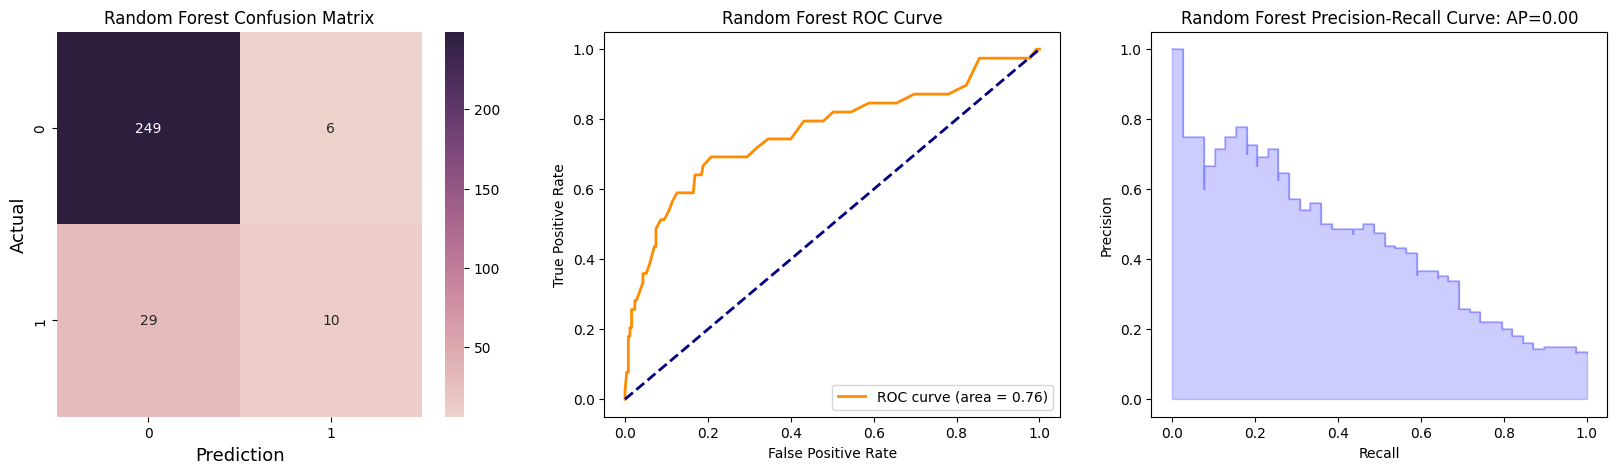

In [ ]:
model_evaluation_plotter('Random Forest', rf, X_test, y_test)

In [ ]:
XGB = XGBClassifier()
train_and_evaluate_model('XGBClassifier', XGB, X_train, X_test, y_train, y_test)

{'model': 'XGBClassifier',
 'accuracy': 0.8707482993197279,
 'precision': 0.5161290322580645,
 'recall': 0.41025641025641024,
 'f1': 0.4571428571428572,
 'cv_scores': array([0.70068027, 0.7414966 , 0.73469388, 0.70068027, 0.95918367,
        0.95238095, 0.91156463, 0.89726027, 0.95205479, 0.95890411])}

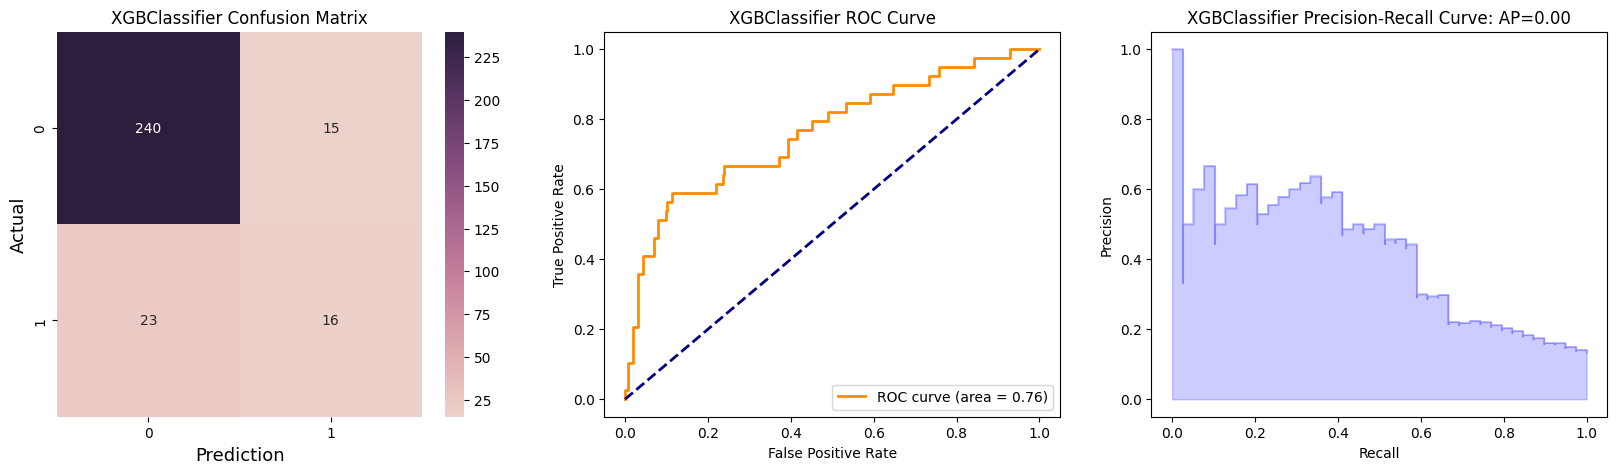

In [ ]:
model_evaluation_plotter('XGBClassifier', XGB, X_test, y_test)

In [ ]:
SVM = SVC(class_weight='balanced', probability=True)
train_and_evaluate_model('SVM', SVM, X_train, X_test, y_train, y_test)

{'model': 'SVM',
 'accuracy': 0.8673469387755102,
 'precision': 0.5,
 'recall': 0.48717948717948717,
 'f1': 0.49350649350649345,
 'cv_scores': array([0.69387755, 0.7755102 , 0.7755102 , 0.72789116, 0.89115646,
        0.91836735, 0.94557823, 0.89041096, 0.9109589 , 0.91780822])}

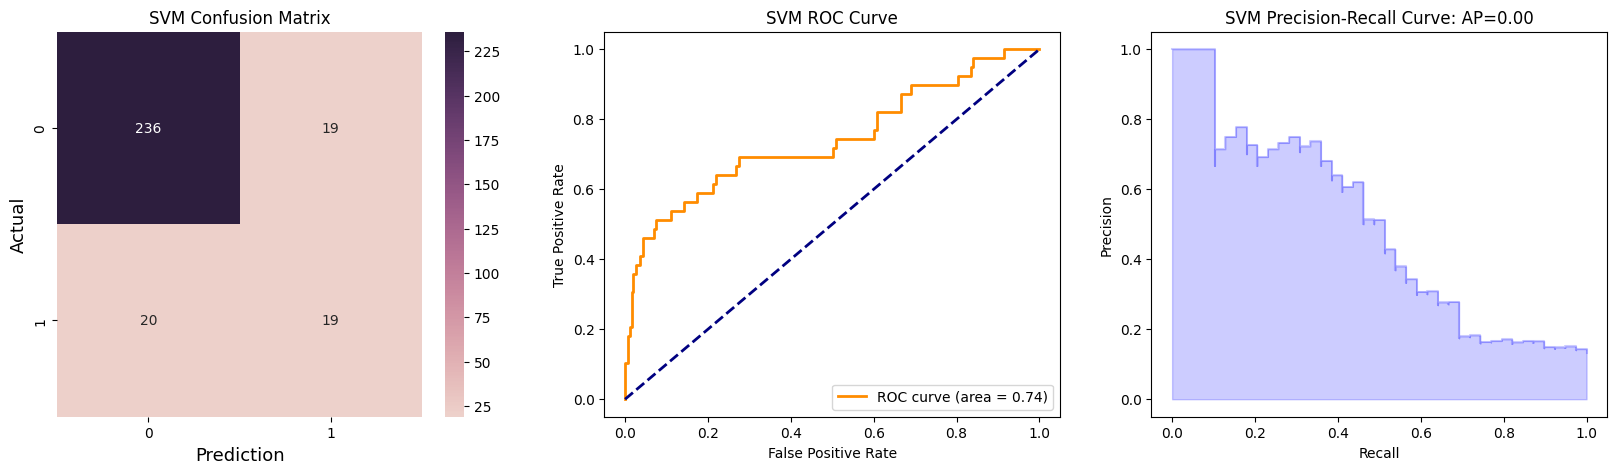

In [ ]:
model_evaluation_plotter('SVM', SVM, X_test, y_test)

In [ ]:
CatB = CatBoostClassifier(verbose = False)
train_and_evaluate_model('Cat Boost', CatB, X_train, X_test, y_train, y_test)

{'model': 'Cat Boost',
 'accuracy': 0.891156462585034,
 'precision': 0.64,
 'recall': 0.41025641025641024,
 'f1': 0.5,
 'cv_scores': array([0.69387755, 0.75510204, 0.73469388, 0.72108844, 0.95918367,
        0.96598639, 0.95238095, 0.9109589 , 0.95890411, 0.95205479])}

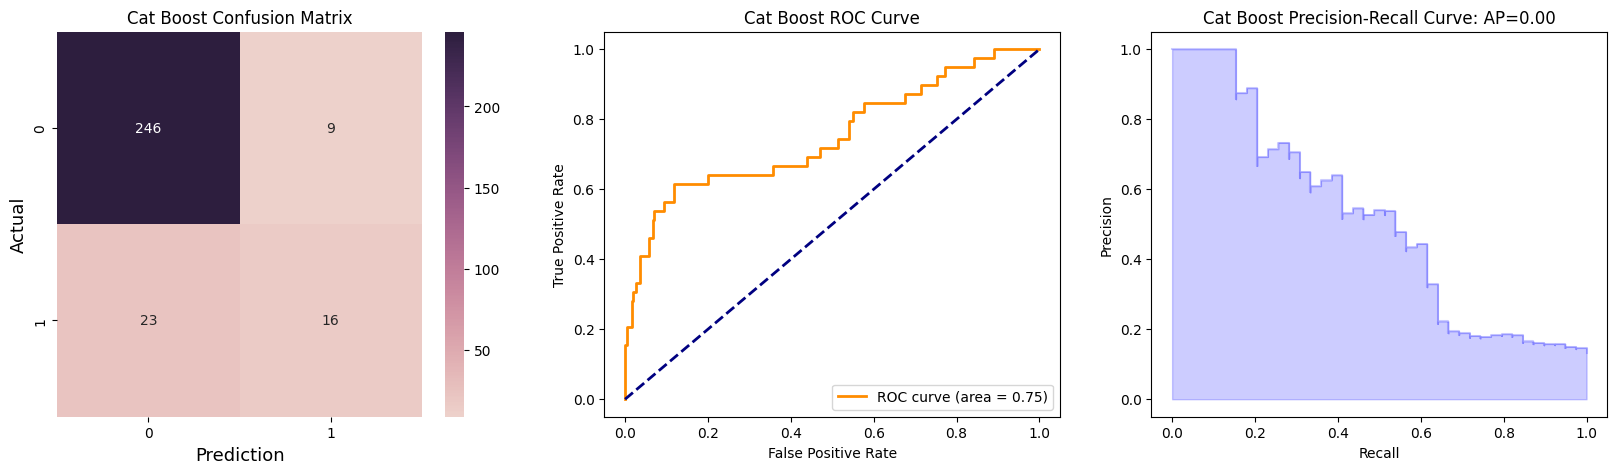

In [ ]:
model_evaluation_plotter('Cat Boost', CatB, X_test, y_test)

In [ ]:
LR = LogisticRegression()
train_and_evaluate_model('Logistic Regression', LR, X_train, X_test, y_train, y_test)

{'model': 'Logistic Regression',
 'accuracy': 0.8639455782312925,
 'precision': 0.48936170212765956,
 'recall': 0.5897435897435898,
 'f1': 0.5348837209302325,
 'cv_scores': array([0.72108844, 0.76870748, 0.74829932, 0.73469388, 0.9047619 ,
        0.9047619 , 0.91836735, 0.8630137 , 0.90410959, 0.86986301])}

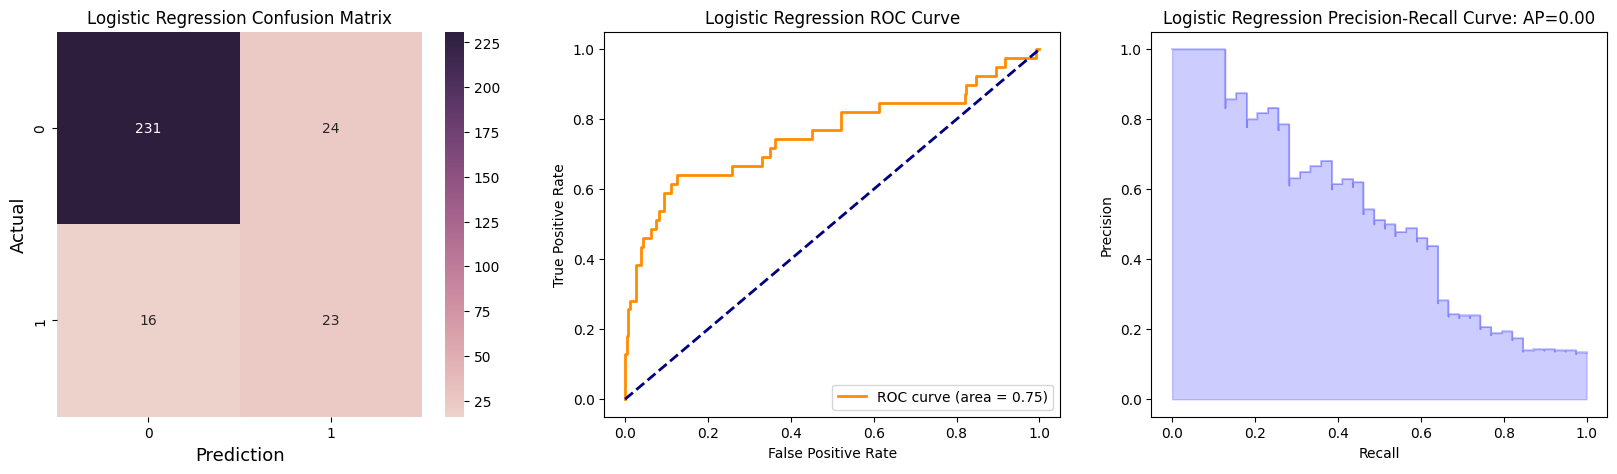

In [ ]:
model_evaluation_plotter('Logistic Regression', LR, X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
train_and_evaluate_model('DecisionTreeClassifier ', clf, X_train, X_test, y_train, y_test)


{'model': 'DecisionTreeClassifier ',
 'accuracy': 0.7891156462585034,
 'precision': 0.2909090909090909,
 'recall': 0.41025641025641024,
 'f1': 0.3404255319148936,
 'cv_scores': array([0.67346939, 0.70068027, 0.68707483, 0.70068027, 0.82312925,
        0.89115646, 0.85714286, 0.80821918, 0.86986301, 0.82191781])}

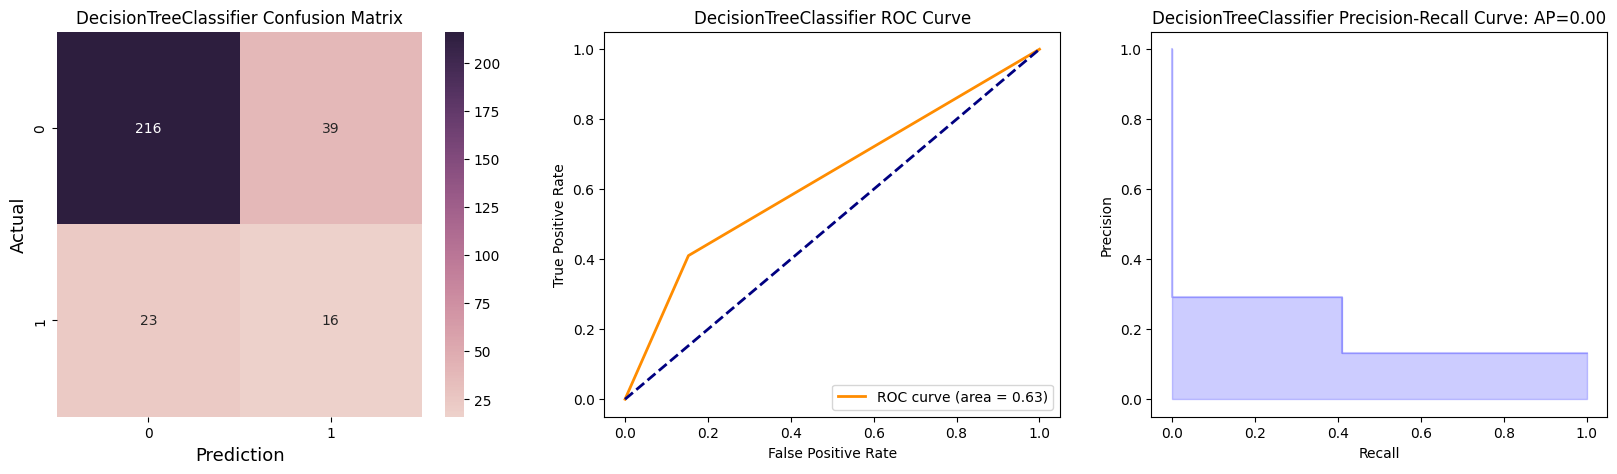

In [ ]:
model_evaluation_plotter('DecisionTreeClassifier', clf, X_test, y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
train_and_evaluate_model('Gaussian Naive Bayes classifier ', gnb, X_train, X_test, y_train, y_test)


{'model': 'Gaussian Naive Bayes classifier ',
 'accuracy': 0.8299319727891157,
 'precision': 0.35135135135135137,
 'recall': 0.3333333333333333,
 'f1': 0.34210526315789475,
 'cv_scores': array([0.67346939, 0.72108844, 0.68027211, 0.67346939, 0.92517007,
        0.91836735, 0.89795918, 0.89726027, 0.93150685, 0.93150685])}

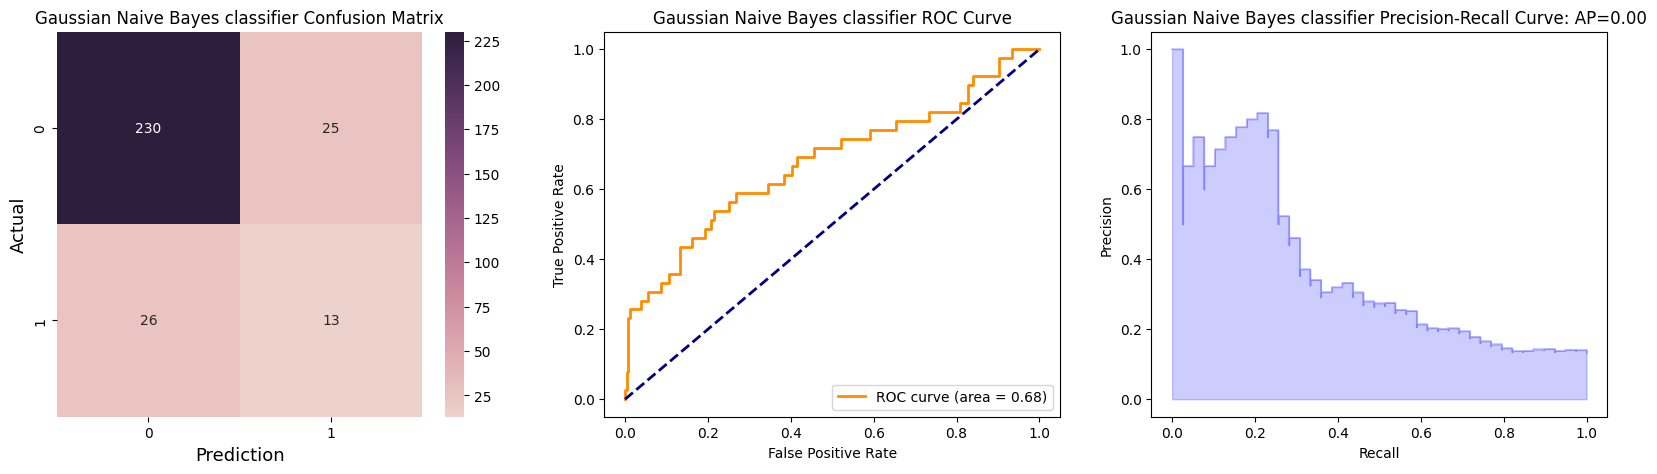

In [ ]:
model_evaluation_plotter('Gaussian Naive Bayes classifier', gnb, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
train_and_evaluate_model('KNeighborsClassifier ', knn, X_train, X_test, y_train, y_test)


{'model': 'KNeighborsClassifier ',
 'accuracy': 0.8401360544217688,
 'precision': 0.36666666666666664,
 'recall': 0.28205128205128205,
 'f1': 0.31884057971014496,
 'cv_scores': array([0.7414966 , 0.81632653, 0.7755102 , 0.76190476, 0.89115646,
        0.91836735, 0.92517007, 0.89726027, 0.9109589 , 0.92465753])}

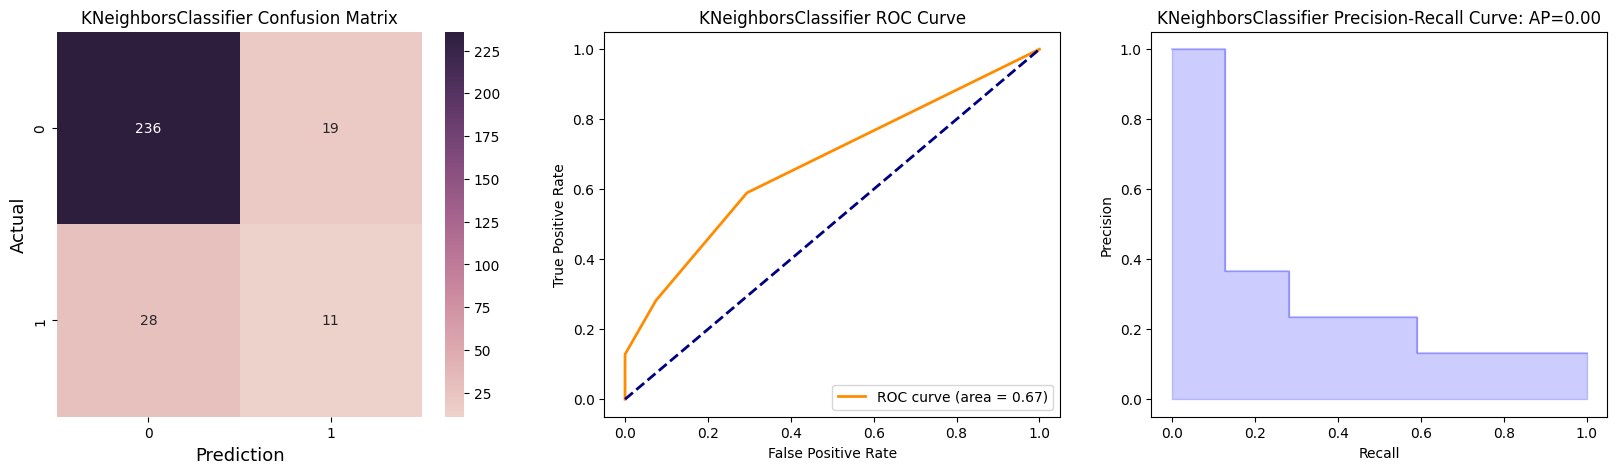

In [ ]:
model_evaluation_plotter('KNeighborsClassifier', knn, X_test, y_test)

### Neural Network and Deep Learning model

neural network

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 500, 250)).fit(X_train, y_train)

In [ ]:
 y_pred = mlp.predict(X_test)

 print(f"accuracy: {accuracy_score(y_test, y_pred)}")
 print(f"precision': {precision_score(y_test, y_pred)}")
 print(f"recall: {recall_score(y_test, y_pred)}")
 print(f"f1: {f1_score(y_test, y_pred)}")

accuracy: 0.8537414965986394
precision': 0.4473684210526316
recall: 0.4358974358974359
f1: 0.44155844155844154


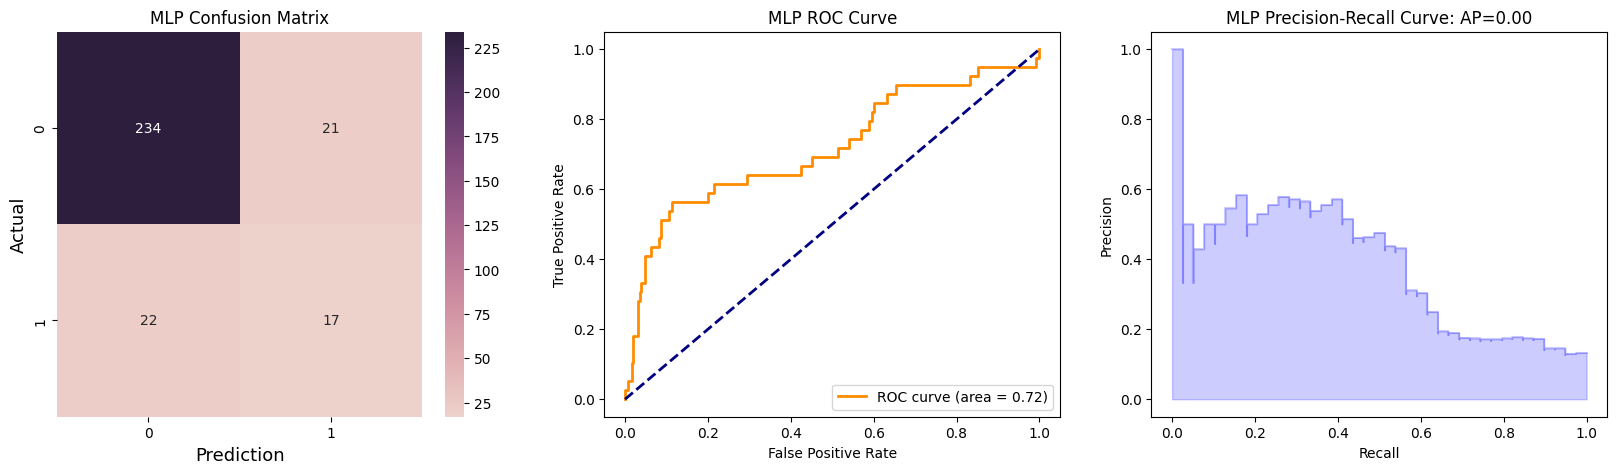

In [ ]:
model_evaluation_plotter("MLP", mlp, X_test, y_test)

 DL model

In [ ]:
X_train.shape

(1467, 25)

In [ ]:
def create_baseline():
    model = Sequential()

    model.add(Dense(32, input_shape=(25,)))
    model.add(Activation('relu'))

    model.add(Dense(64))
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(Activation('relu'))

    # Output layer contains 1 neuron for binary classification and uses sigmoid activation function
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)

In [ ]:
estimator.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KerasClassifier(
	model=None
	build_fn=<function create_baseline at 0x79fb823b76d0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

In [ ]:
y_pred = estimator.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100))

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.2f" % f1)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 83.33%
F1 Score: 0.40
Recall: 0.41
Precision: 0.38
Confusion Matrix:
[[229  26]
 [ 23  16]]


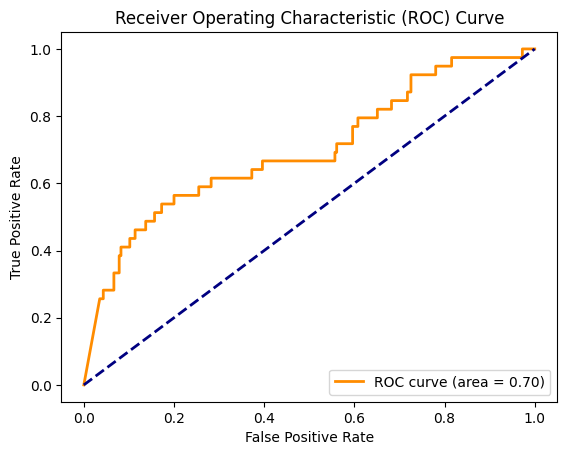

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, estimator.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Model Tuning & Final Results**

We perform model tuning by conducting hyperparameter tuning on models that have shown success in training.

In [ ]:
def FindBestParams(model, params, X_train, y_train, X_test, y_test, cv=10, scoring='accuracy', verbose=0):
    gsc = GridSearchCV(estimator=model,
                       param_grid=params,
                       cv=cv,
                       scoring= scoring,
                       n_jobs=5,
                       verbose=verbose)
    gsc.fit(X_train, y_train)

    print("******** GRIDSEARCH RESULTS ******** ")
    print(f"Train Score: {gsc.score(X_train,y_train)}")
    print(f"Test Score: {gsc.score(X_test,y_test)}")
    print("*************************************")

    return gsc.best_estimator_

### SGDClassifier

In [ ]:
sgd_param_grid = {'loss': ['log'],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'max_iter': [50, 500, 1000, 2000],
                  'class_weight': ['balanced', None]
}

sgd_n = SGDClassifier()

In [ ]:
FindBestParams(sgd_n, sgd_param_grid, X_train, y_train, X_test, y_test)

******** GRIDSEARCH RESULTS ******** 
Train Score: 0.8152692569870484
Test Score: 0.8367346938775511
*************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=50, penalty='l1')

In [ ]:
final_sgd = SGDClassifier(loss='log', max_iter=50, penalty='l1', class_weight = 'balanced')
train_and_evaluate_model('Tuned SGDClassifier Model', final_sgd, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

{'model': 'Tuned SGDClassifier Model',
 'accuracy': 0.8061224489795918,
 'precision': 0.36363636363636365,
 'recall': 0.6153846153846154,
 'f1': 0.4571428571428572,
 'cv_scores': array([0.74829932, 0.7414966 , 0.71428571, 0.72108844, 0.8707483 ,
        0.83673469, 0.73469388, 0.74657534, 0.83561644, 0.82191781])}

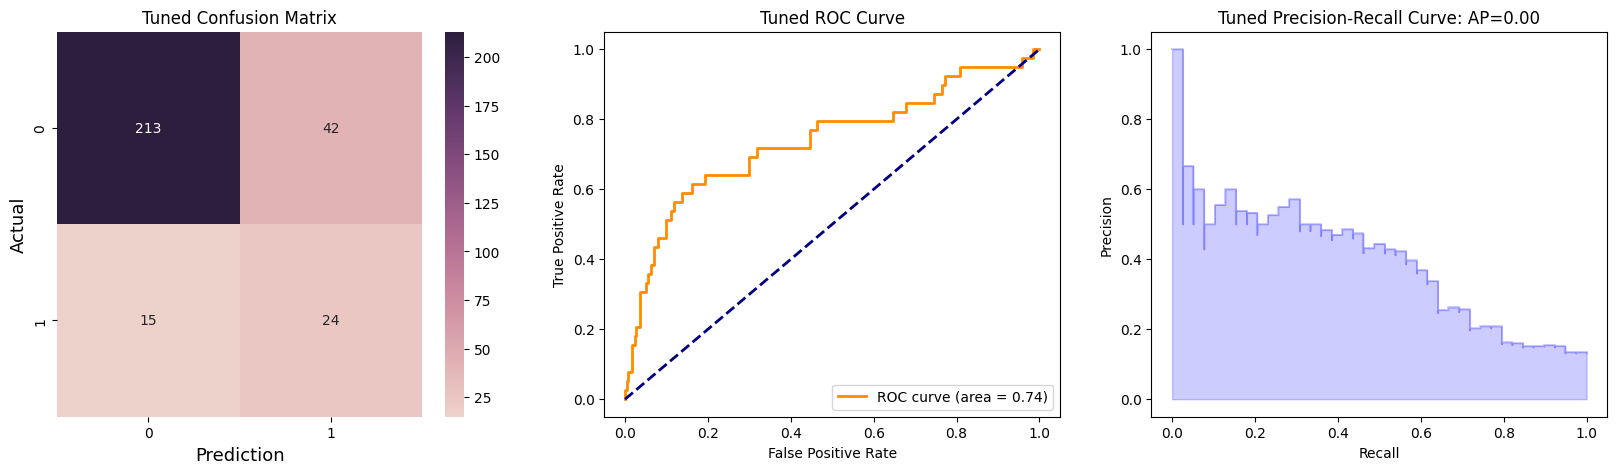

In [ ]:
model_evaluation_plotter("Tuned", final_sgd, X_test, y_test)

### Logistic Regression

In [ ]:
log_param_grid = {'penalty': ['l1', 'l2','elasticnet', None],
                  'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                  'class_weight': ['balanced', None],
                  'random_state': [10, 50, 100],
                  'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
                  'max_iter': [100,500, 1000, 1000] }

In [ ]:
LR = LogisticRegression()
FindBestParams(LR, log_param_grid,
               X_train,
               y_train,
               X_test,
               y_test,
               cv=10,
               scoring='accuracy',
               verbose=0)

******** GRIDSEARCH RESULTS ******** 
Train Score: 0.8507157464212679
Test Score: 0.8639455782312925
*************************************


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10080 fits failed out of a total of 23040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

LogisticRegression(C=0.1, random_state=10, solver='saga')

In [ ]:
 final_LR = LogisticRegression(C=0.1, penalty='l1', random_state=10, class_weight='balanced', solver='saga')
 train_and_evaluate_model('Tuned Logistic Regression Model', final_LR, X_train, X_test, y_train, y_test)

{'model': 'Tuned Logistic Regression Model',
 'accuracy': 0.8299319727891157,
 'precision': 0.4098360655737705,
 'recall': 0.6410256410256411,
 'f1': 0.5,
 'cv_scores': array([0.76870748, 0.76190476, 0.76190476, 0.70748299, 0.8707483 ,
        0.88435374, 0.85714286, 0.78082192, 0.82191781, 0.83561644])}

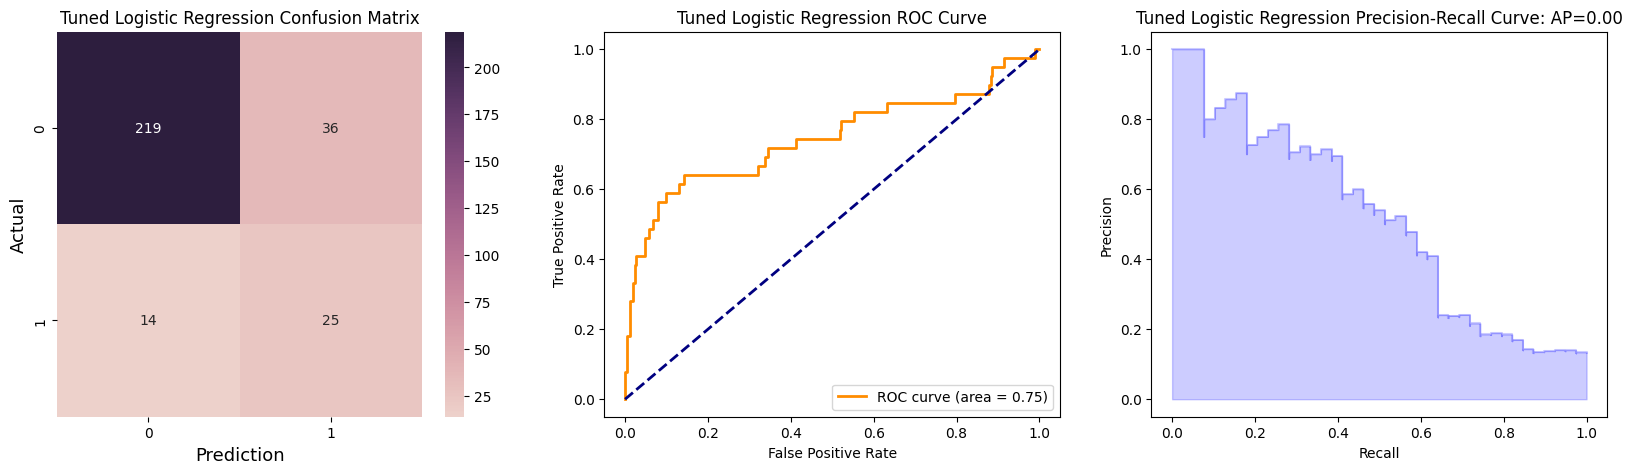

In [ ]:
 model_evaluation_plotter("Tuned Logistic Regression", final_LR, X_test, y_test)

### MLPClassifier

In [ ]:
mlp_param_grid = {
        'hidden_layer_sizes': [(50, 100, 50), (50, 100), (250, 500, 250)],
        'max_iter': [100, 500, 1000, 1500],
        'activation': ['relu', 'softmax'],
        'learning_rate': ['adaptive', 'sgd'],
        'solver': ['sgd', 'adam'],
        'learning_rate_init': [0.001, 0.1]
    }

In [ ]:
mlp_n = MLPClassifier()
FindBestParams(mlp_n, mlp_param_grid, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
451 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/d

******** GRIDSEARCH RESULTS ******** 
 Train Score: 1.0 
 Test Score: 0.8809523809523809 
*************************************




MLPClassifier(hidden_layer_sizes=(250, 500, 250), learning_rate='adaptive',
              max_iter=1500)

In [ ]:
mlp_best = MLPClassifier(hidden_layer_sizes=(250, 500, 250),
                         learning_rate='adaptive',
                         max_iter=1500).fit(X_train,
                                            y_train)
y_pred = mlp_best.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision': {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")

accuracy: 0.8639455782312925
precision': 0.4838709677419355
recall: 0.38461538461538464
f1: 0.4285714285714286


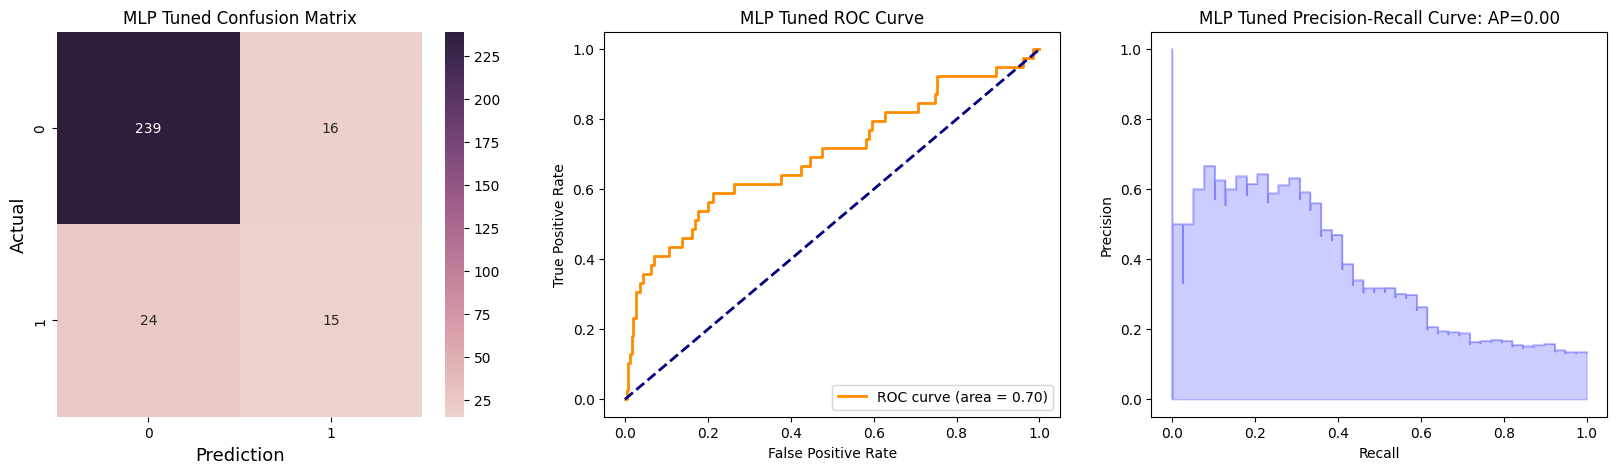

In [ ]:
model_evaluation_plotter("MLP Tuned", mlp_best, X_test, y_test)

## Final Result

The model that made the most accurate predictions is **Logistic Regression**. Let's now look at the final results.

In [ ]:
final_results = train_and_evaluate_model('Final Results (Logistic Regression)', final_LR, X_train, X_test, y_train, y_test)

In [ ]:
final_results

{'model': 'Final Results (Logistic Regression)',
 'accuracy': 0.8299319727891157,
 'precision': 0.4098360655737705,
 'recall': 0.6410256410256411,
 'f1': 0.5,
 'cv_scores': array([0.76870748, 0.76190476, 0.76190476, 0.70748299, 0.8707483 ,
        0.88435374, 0.85714286, 0.78082192, 0.82191781, 0.83561644])}

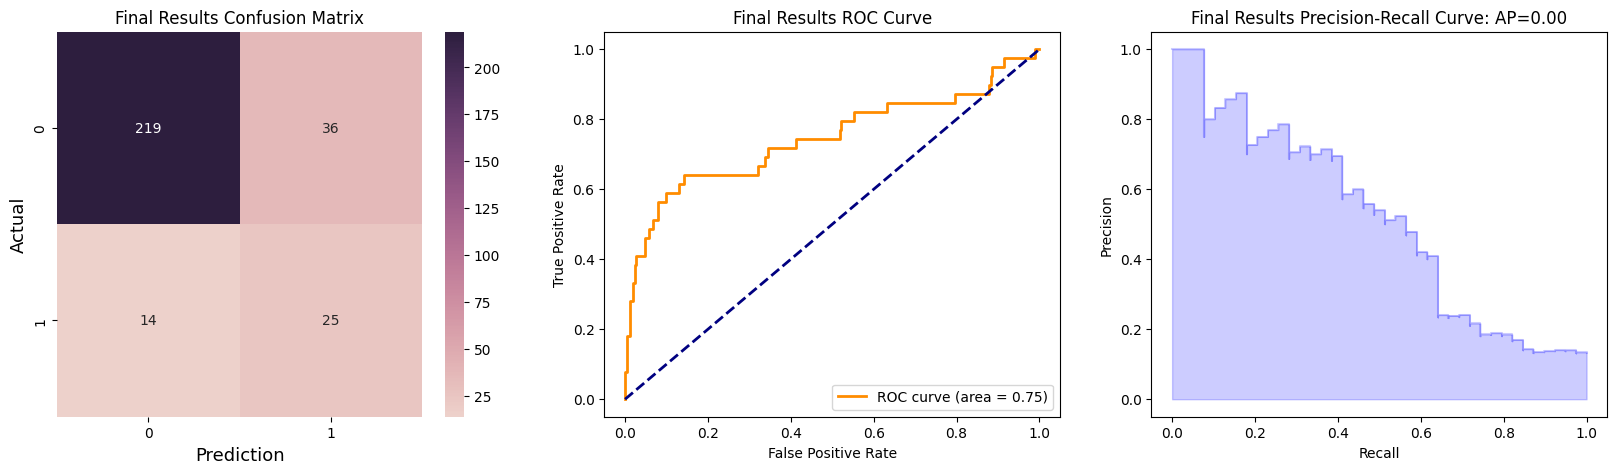

In [ ]:
model_evaluation_plotter("Final Results", final_LR, X_test, y_test)

The most important features that companies should pay attention to in order not to lose their employees

In [ ]:
coefficients = final_LR.coef_[0]
feature_names = X.columns

feature_importance = dict(zip(feature_names, coefficients))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, coef in sorted_feature_importance:
    print(f"{feature}: {coef}")

JobInvolvement: -0.78489882046466
DistanceFromHome: 0.5930882016289224
Age: -0.4803742375946437
WorkLifeBalance: 0.42862710139157567
DailyRate: 0.42145254534867127
JobLevel: -0.33704916499796467
PercentSalaryHike: 0.3244521186782341
StockOptionLevel: -0.30294070022500175
BusinessTravel_Travel_Rarely: 0.22829536665990466
YearsWithCurrManager: -0.11896675233941663
EnvironmentSatisfaction: 0.1131405675177304
YearsSinceLastPromotion: 0.09876723443119079
Education: -0.09548256587721628
YearsAtCompany: 0.08332965457243781
HourlyRate: 0.08332372722401432
BusinessTravel_Travel_Frequently: 0.07360928661435993
PerformanceRating: 0.06774045537411179
RelationshipSatisfaction: -0.059421460933971756
MonthlyRate: 0.0466817180840654
YearsInCurrentRole: 0.03197820058216096
MonthlyIncome: 0.014276752857672397
JobSatisfaction: -0.011813615708339723
TrainingTimesLastYear: -0.009871408320579252
NumCompaniesWorked: -0.005256721078797674
TotalWorkingYears: 0.0


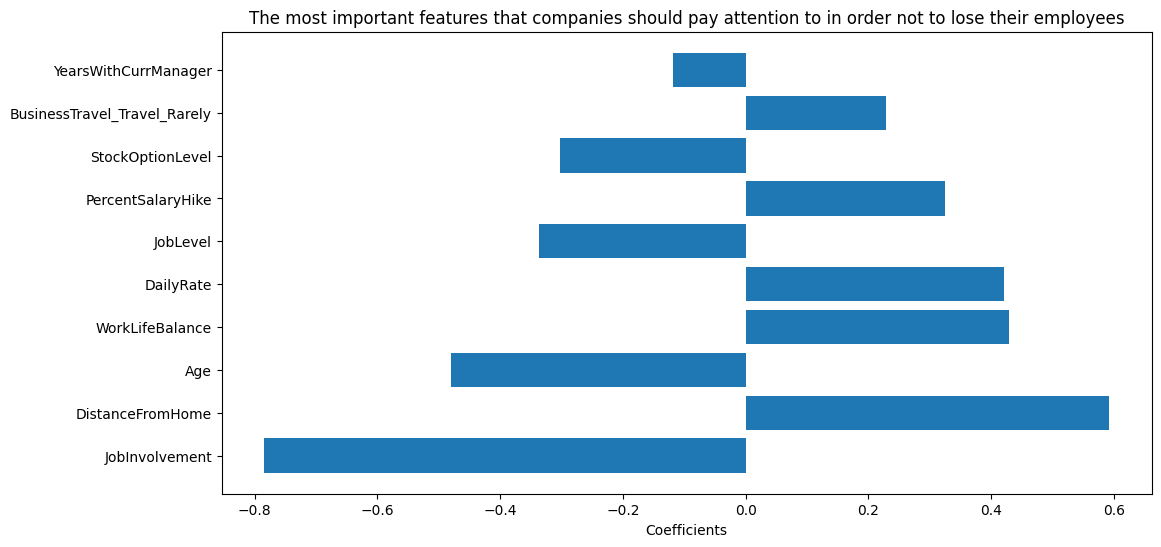

In [ ]:
top_features = 10
features, coefficients = zip(*sorted_feature_importance[:top_features])

plt.figure(figsize=(12, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficients')
plt.title('The most important features that companies should pay attention to in order not to lose their employees')
plt.show()


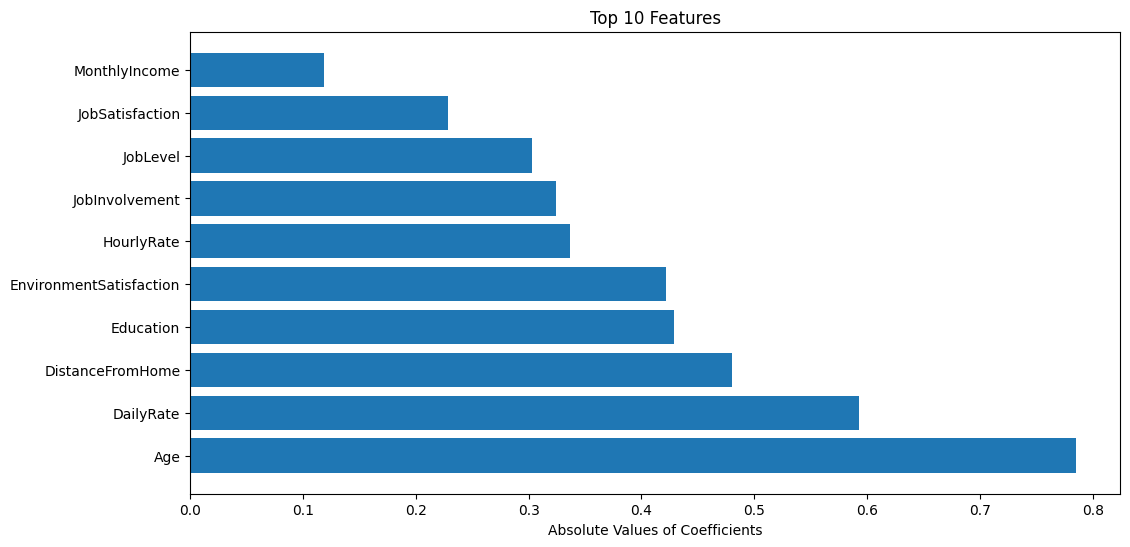

In [ ]:
# Absolute values of coefficients
absolute_coefficients = [abs(coef) for coef in coefficients]

# Sort features by coefficients
sorted_indices = sorted(range(len(absolute_coefficients)), key=lambda k: absolute_coefficients[k], reverse=True)
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_absolute_coefficients = [absolute_coefficients[i] for i in sorted_indices]

# Visualize the importance ranking of features
plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:10], sorted_absolute_coefficients[:10])
plt.xlabel('Absolute Values of Coefficients')
plt.title('Top 10 Features')
plt.show()
